In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Concrete_Data.csv")

In [4]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
#checking for null values
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

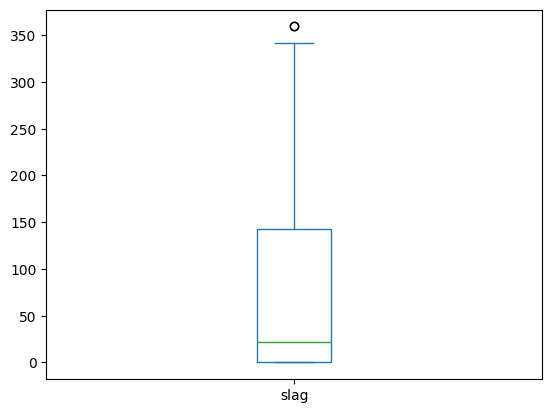

In [8]:
df["slag"].plot(kind="box")

<Axes: >

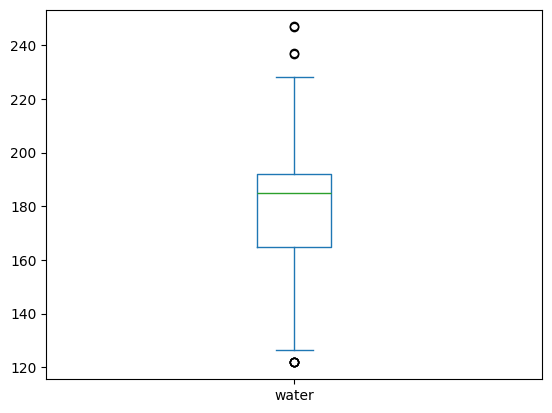

In [10]:
df["water"].plot(kind="box")

<Axes: ylabel='Frequency'>

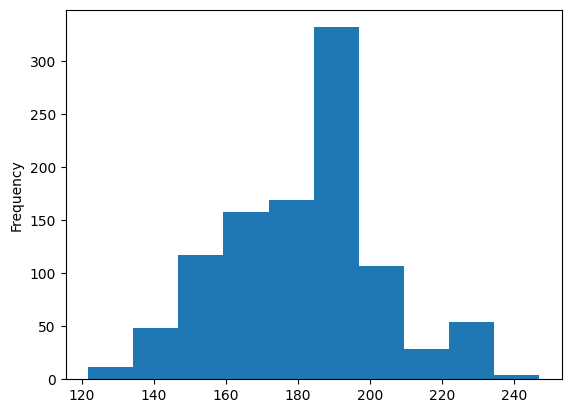

In [11]:
df["water"].plot(kind="hist")

<Axes: >

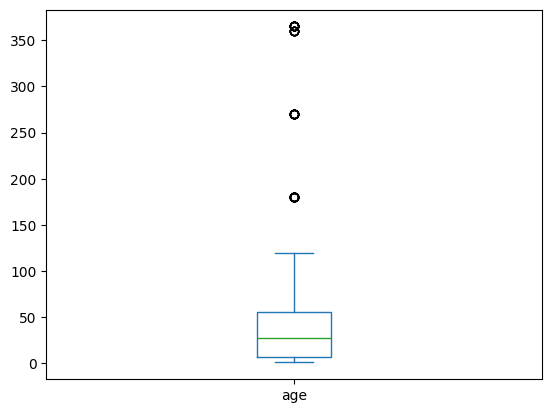

In [12]:
df["age"].plot(kind="box")

In [13]:
df["age"].quantile(0.95)

180.0

In [14]:
df["age"].quantile(.75)

56.0

In [15]:
df["age"].quantile(.90)

100.0

In [16]:
df[df["age"] < df["age"].quantile(.90)]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [20]:
new_df = df[df["age"] < df["age"].quantile(.90)]

<Axes: >

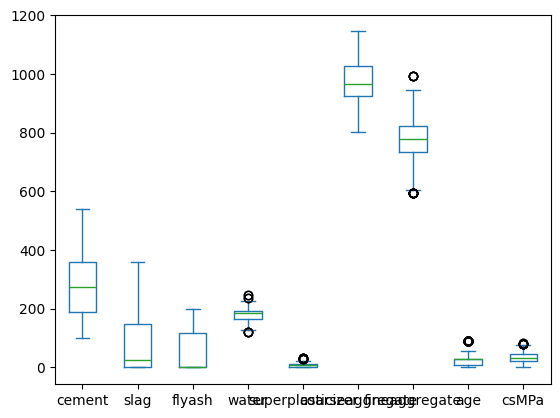

In [21]:
new_df.plot(kind="box")

In [24]:
new_df.shape

(916, 9)

In [23]:
df["age"].value_counts()

age
28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: count, dtype: int64

In [25]:
new_df["age"].value_counts()

age
28    425
3     134
7     126
56     91
14     62
90     54
91     22
1       2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

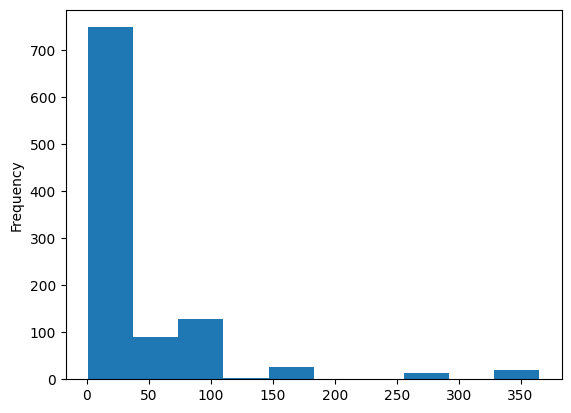

In [26]:
df["age"].plot(kind="hist")

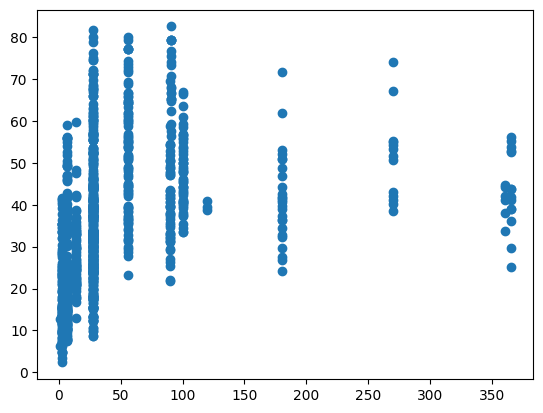

In [27]:
plt.scatter(df["age"],df["csMPa"])

In [28]:
np.corrcoef(df["age"],df["csMPa"])

array([[1.      , 0.328873],
       [0.328873, 1.      ]])

In [29]:
np.corrcoef(df["water"],df["csMPa"])

array([[ 1.        , -0.28963338],
       [-0.28963338,  1.        ]])

In [30]:
df["water"].corr(df["csMPa"])

-0.2896333849853046

<Axes: >

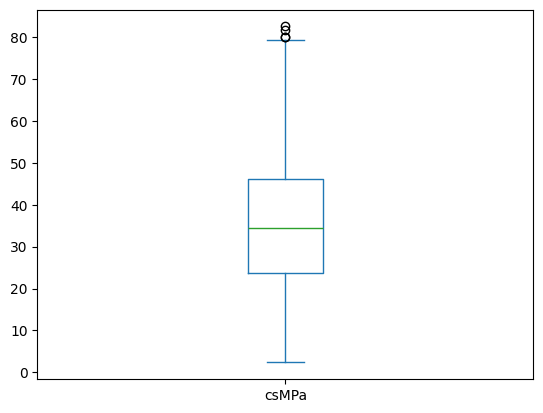

In [31]:
df["csMPa"].plot(kind="box")

In [64]:
df["csMPa"].quantile(0.97)

71.3416

In [66]:
df[df["csMPa"] <= df["csMPa"].quantile(0.97)]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [34]:
new_df = df[df["csMPa"] <= df["csMPa"].quantile(0.97)]

<Axes: >

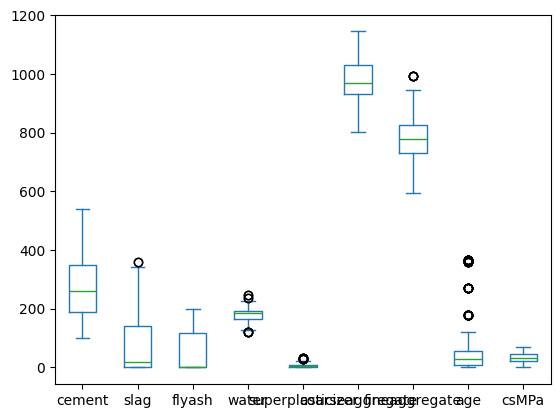

In [35]:
new_df.plot(kind="box")

<Axes: >

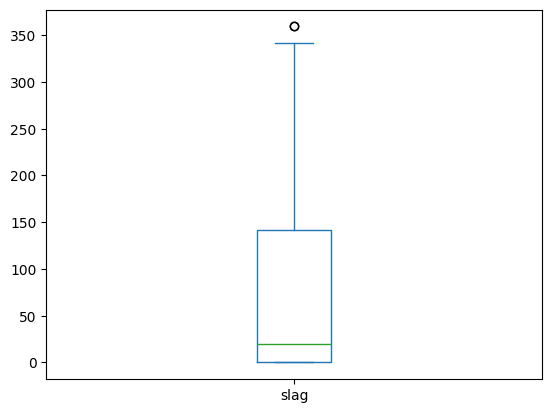

In [36]:
new_df["slag"].plot(kind="box")

In [37]:
new_df["slag"].quantile(0.995)

316.1

In [38]:
newdf=new_df[new_df["slag"]<=316.1]

<Axes: >

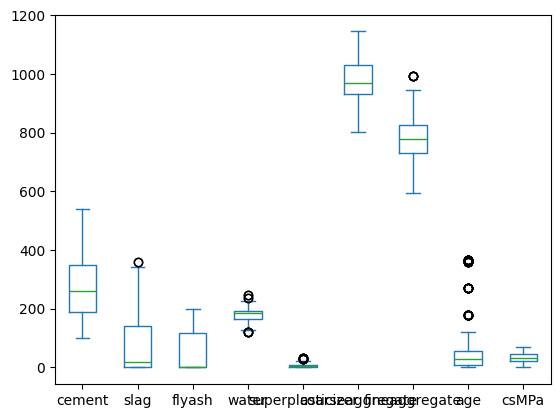

In [39]:
new_df.plot.box()

<Axes: >

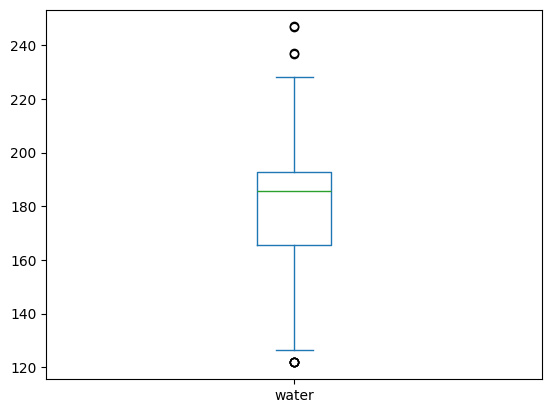

In [40]:
new_df["water"].plot.box()

In [41]:
new_df["water"].quantile(0.95)

228.0

In [67]:
new_df=new_df[new_df["water"]<= new_df["water"].quantile(0.95)]

<Axes: >

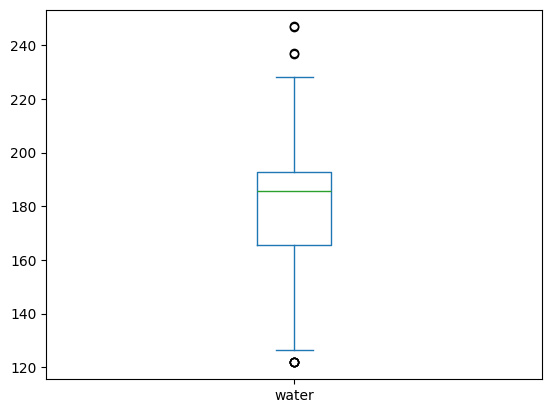

In [43]:
new_df["water"].plot.box()

In [46]:
new_df["water"].quantile(0.015)

137.8

In [70]:
new_df=new_df[new_df["water"]<= new_df["water"].quantile(0.015)]

<Axes: >

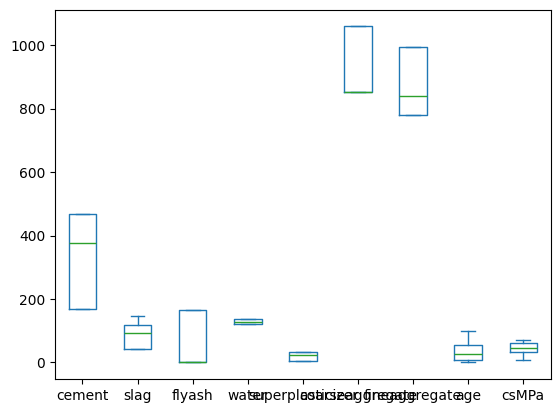

In [71]:
new_df.plot.box()

In [72]:
new_df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

<Axes: >

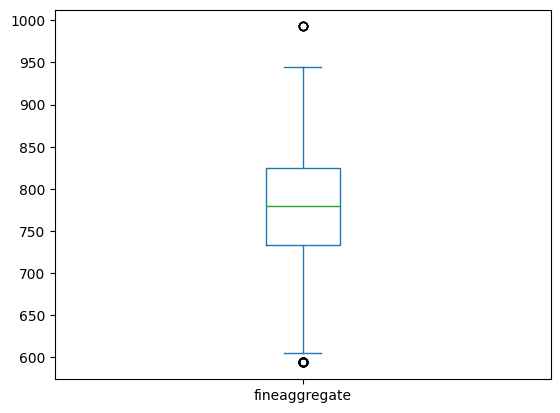

In [68]:
new_df["fineaggregate"].plot.box()

In [78]:
new_df["fineaggregate"].quantile(0.05)

780.1

In [76]:
new_df["fineaggregate"].corr(new_df["csMPa"])

0.40573304775468105

In [77]:
new_df.drop("age",axis=1,inplace=True)

In [52]:
new_df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,csMPa
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,29.0
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,40.2
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,45.7
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,54.9
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56.7


In [79]:
X = new_df.drop("csMPa",axis=1)

In [80]:
y=new_df["csMPa"]

In [82]:
X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6


In [83]:
y.head()

74     29.0
76     40.2
97     45.7
99     54.9
120    56.7
Name: csMPa, dtype: float64

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [84]:
X = scaler.fit_transform(X)

In [85]:
X

array([[ 0.34254043,  0.06559436, -0.64549722, -0.3081739 ,  0.39905894,
        -0.82304437,  1.48968881],
       [ 1.13664984,  0.72786429, -0.64549722,  1.4645243 ,  1.19187722,
        -0.82304437, -0.29029657],
       [ 0.34254043,  0.06559436, -0.64549722, -0.3081739 ,  0.39905894,
        -0.82304437,  1.48968881],
       [ 1.13664984,  0.72786429, -0.64549722,  1.4645243 ,  1.19187722,
        -0.82304437, -0.29029657],
       [ 0.34254043,  0.06559436, -0.64549722, -0.3081739 ,  0.39905894,
        -0.82304437,  1.48968881],
       [ 1.13664984,  0.72786429, -0.64549722,  1.4645243 ,  1.19187722,
        -0.82304437, -0.29029657],
       [ 0.34254043,  0.06559436, -0.64549722, -0.3081739 ,  0.39905894,
        -0.82304437,  1.48968881],
       [ 1.13664984,  0.72786429, -0.64549722,  1.4645243 ,  1.19187722,
        -0.82304437, -0.29029657],
       [ 0.34254043,  0.06559436, -0.64549722, -0.3081739 ,  0.39905894,
        -0.82304437,  1.48968881],
       [ 1.13664984,  0.7278

In [86]:
X.shape

(17, 7)

In [87]:
y.shape

(17,)

In [62]:
from sklearn.model_selection import  train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=43)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression()

In [91]:
lr.fit(X_train,y_train)

LinearRegression()

In [92]:
y_pred = lr.predict(X_test)

In [94]:
from sklearn.metrics import r2_score,mean_squared_error

In [98]:
r2 = r2_score(y_test, y_pred)

In [95]:
mean_squared_error(y_test,y_pred

122.7710068404453

In [99]:
adj_r2=1 - (((1-r2)*(len(X_test)-1))/(len(X_test)-7-1))

In [100]:
adj_r2

1.418080639570769

In [101]:
r2

0.4425591472389747